# Fetal Partial Pathlength Distribution
In this notebook, we look at how the fetal partial pathlength (L4 ppath) is distributed accross different wavelengths and specifically different depths. The goal is to figure out a binning such that we can use it in a physics-based loss scenerio. Ideally, I would expect to bin $exp(-L_4)$ rather than $L_4$ itself and also for the model to figure out the bin centers. But that might be too high of an expectation.

In [41]:
from pathlib import Path
from glob import glob
import pandas as pd
import json

raw_file_path = Path(r'/home/rraiyan/simulations/tfo_sim/data/dan_iccps_pencil2')

raw_files = list(raw_file_path.glob("*.pkl"))  # RAW files are in pickle format
raw_files = [Path(file) for file in raw_files]

file1 = raw_files[2]
config1 = file1.with_suffix('.json')
raw_data1 = pd.read_pickle(file1)
with open(config1) as f:
    config_data1 = json.load(f)

In [42]:
from tfo_sim.misc import generate_sdd_column

sdd_col = generate_sdd_column(raw_data1).astype(int)
all_sdd = sdd_col.unique()
all_sdd.sort()
print(all_sdd)

[10 15 19 24 28 33 37 41 46 50 55 59 64 68 72 77 81 86 90 94]


In [43]:
chosen_sdd = 37
raw_data1 = raw_data1[sdd_col == chosen_sdd]
l4_col = raw_data1['L4 ppath']
print("Non zero values: ", l4_col.shape[0])

Non zero values:  1919520


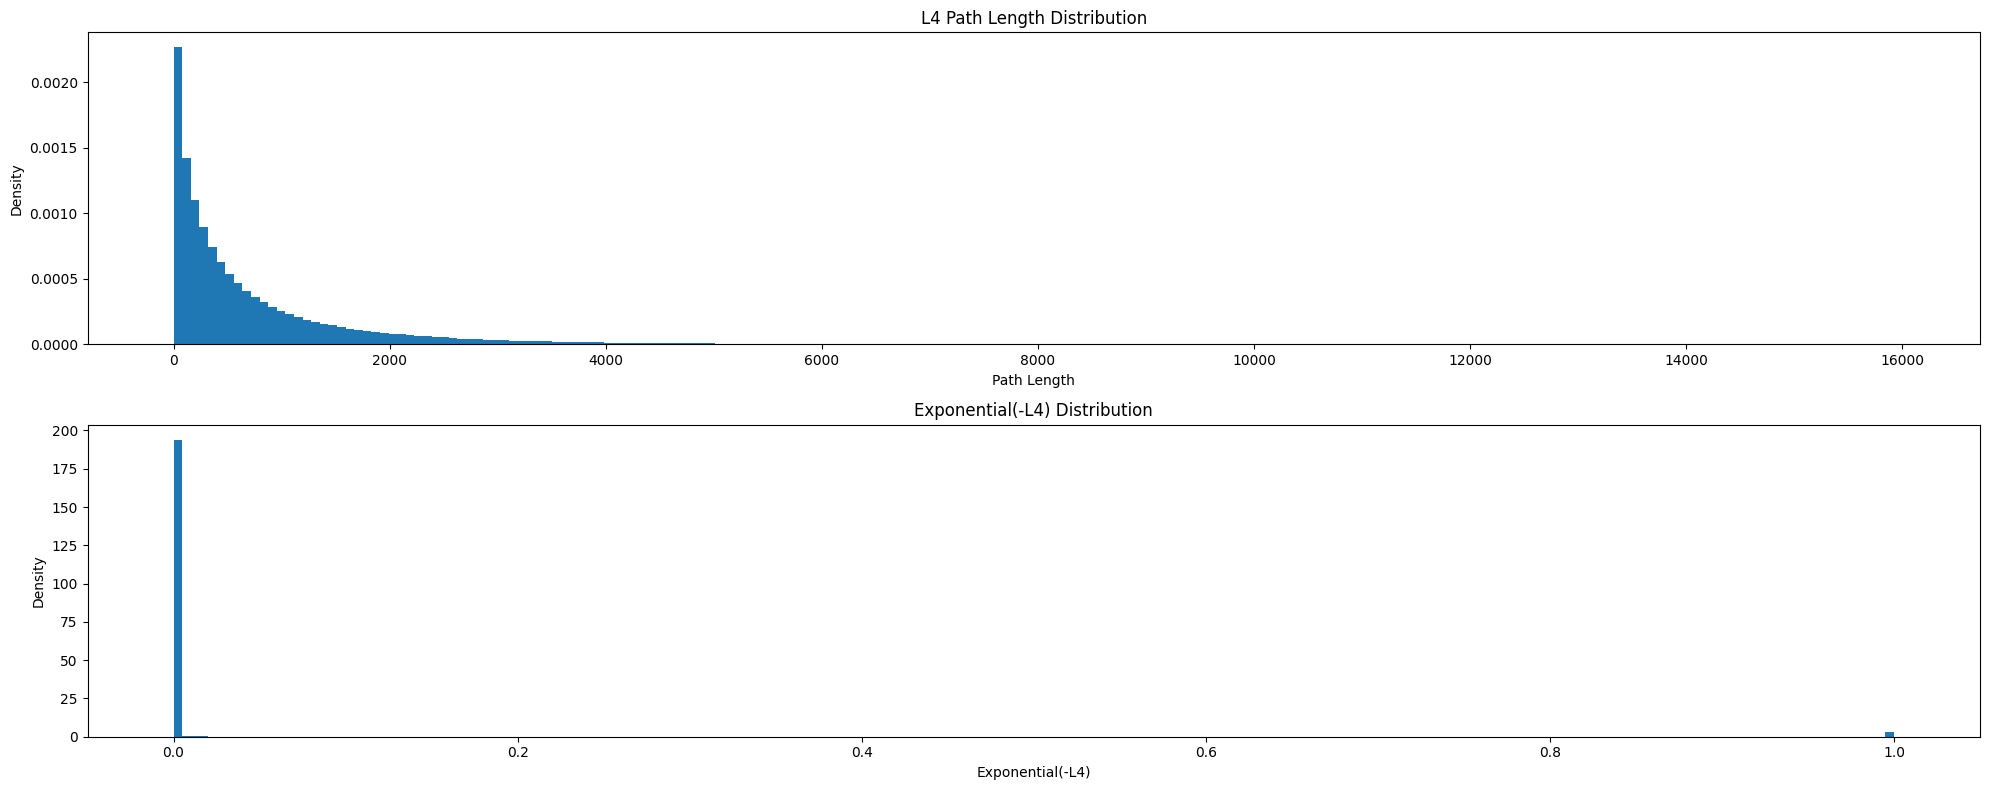

In [44]:
import numpy as np
import matplotlib.pyplot as plt

BIN_COUNT = 200

dist_fig, axes = plt.subplots(2, 1, figsize=(20, 8))
axes[0].hist(l4_col, bins=BIN_COUNT, density=True)
axes[0].set_title("L4 Path Length Distribution")
axes[0].set_xlabel("Path Length")
axes[0].set_ylabel("Density")

exp_neg_l4 = np.exp(-l4_col)
axes[1].hist(exp_neg_l4, bins=BIN_COUNT, density=True)
axes[1].set_title("Exponential(-L4) Distribution")
axes[1].set_xlabel("Exponential(-L4)")
axes[1].set_ylabel("Density")
plt.tight_layout()
plt.show()

In [60]:
# comparing actual sum vs. histogram sum in EXP mode
mu = 0.04   # mm-1
print("Actual sum: ", np.power(exp_neg_l4, mu).mean())

dist, bin_edges = np.histogram(exp_neg_l4, bins=BIN_COUNT, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
print("Histogram sum: ", (dist * np.power(bin_centers, mu)).sum())

Actual sum:  0.073288495743428
Histogram sum:  158.35675254488595


In [59]:
# Comparing actual sum vs. histogram sum in L4 mode
print("Actual sum: ", np.exp(-mu * l4_col).mean())

array([1.95282050e+01, 4.23751771e-02, 2.55167959e-02, 1.76710844e-02,
       1.45453030e-02, 1.20967742e-02, 9.93998500e-03, 8.87721930e-03,
       7.94990414e-03, 7.39768275e-03, 6.85588064e-03, 6.01191965e-03,
       5.30340919e-03, 5.13670084e-03, 5.03250813e-03, 4.37609402e-03,
       4.25106277e-03, 4.09477369e-03, 3.80303409e-03, 2.80559723e-01])